In [4]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 500 fairness threshold our implementation

In [5]:
with open('focops_results/focops_group fairness_0_HalfCheetah-v4_log_data_seed_1500threshold.pkl', 'rb') as f:
    group0 = pickle.load(f)
with open('focops_results/focops_inf_1_BigFootHalfCheetah_log_data_seed_1.pkl', 'rb') as f:
    group1 = pickle.load(f)

/Users/Kefan/miniconda3/envs/torch/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
def smooth(arr, window_size = 30):
    avg = []
    for i in range(len(arr[:-window_size])):
        avg.append(np.mean(arr[i:i+window_size]))
    return avg

In [7]:
time_steps0 = np.array(list(range(len(group0['AvgR']))))*1024
time_steps1 = np.array(list(range(len(group1['AvgR']))))*1024

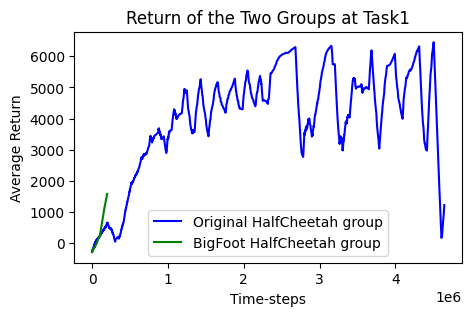

In [8]:
plt.figure(figsize=(5, 3))

plt.plot(time_steps0, group0['AvgR'],label='Original HalfCheetah group', color='blue')
plt.plot(time_steps1, group1['AvgR'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

In [9]:
# train iteration = 44, 4*1e6
# train iteration = 25

# BigFootHalfCheetah Environment without Constraint

In [182]:
with open('focops_results/focops_inf_big_foot_half_cheetah_log_data_seed_1.pkl', 'rb') as f:
    bigfoot = pickle.load(f)

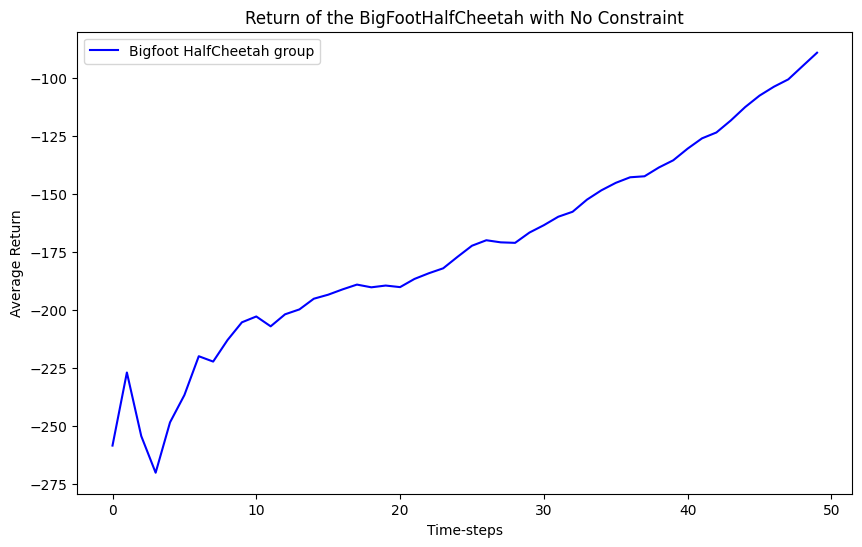

In [183]:
plt.figure(figsize=(10, 6))

plt.plot(bigfoot['AvgR'],label='Bigfoot HalfCheetah group', color='blue')

plt.title("Return of the BigFootHalfCheetah with No Constraint")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

# Two tasks: Running forward and running backward

In [3]:
with open('focops_results/focops_group fairness_0_HalfCheetah-v4_log_data_seed_1_forward_backward.pkl', 'rb') as f:
    log = pickle.load(f)

/Users/Kefan/miniconda3/envs/torch/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


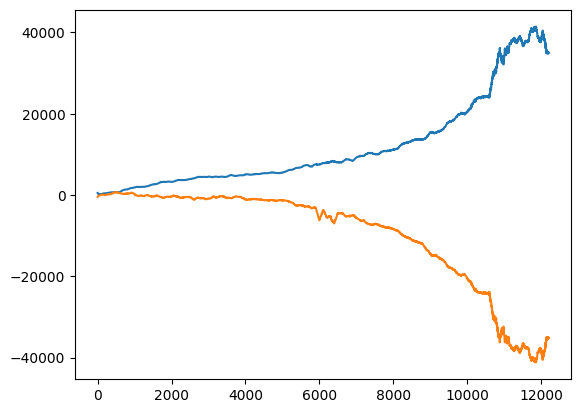

In [4]:
plt.plot(log['AvgR2'])
plt.plot(log['AvgR'])


In [5]:
with open('focops_results/focops_group fairness_1_BigFootHalfCheetah_log_data_seed_1_forward_backward.pkl', 'rb') as f:
    log = pickle.load(f)

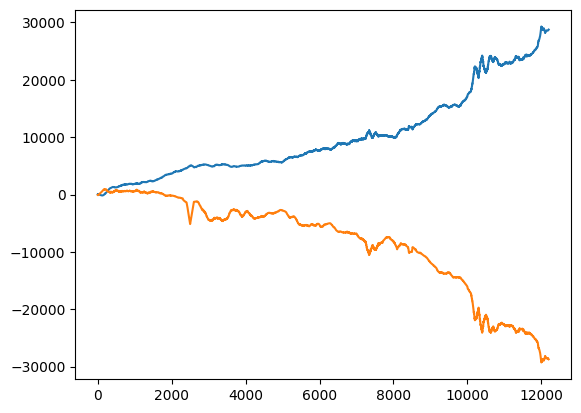

In [6]:
plt.plot(log['AvgR2'])
plt.plot(log['AvgR'])


# For Fairness Threshold = 1000 with two constraint functions

In [140]:
with open('focops_results/focops_group fairness_0_HalfCheetah-v4_log_data_seed_1.pkl', 'rb') as f:
    group0 = pickle.load(f)
with open('focops_results/focops_group fairness_1_BigFootHalfCheetah_log_data_seed_1.pkl', 'rb') as f:
    group1 = pickle.load(f)

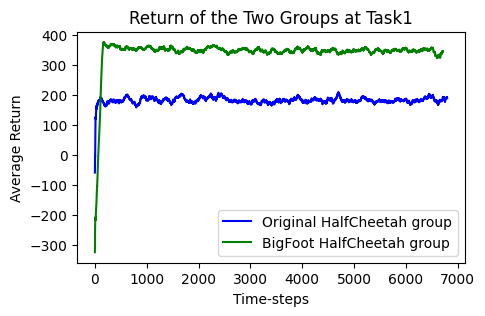

In [141]:
plt.figure(figsize=(5, 3))

plt.plot(group0['AvgR'],label='Original HalfCheetah group', color='blue')
plt.plot(group1['AvgR'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

# For Fairness Threshold = 500 with two constraint functions

In [304]:
with open('focops_results/focops_inf_0_HalfCheetah-v4_log_data_seed_1.pkl', 'rb') as f:
    group0 = pickle.load(f)
with open('focops_results/focops_inf_1_BigFootHalfCheetah_log_data_seed_1.pkl', 'rb') as f:
    group1 = pickle.load(f)

In [94]:
with open('focops_results/focops_group fairness_0_HalfCheetah-v4_log_data_seed_1.pkl', 'rb') as f:
    group0 = pickle.load(f)
with open('focops_results/focops_group fairness_1_BigFootHalfCheetah_log_data_seed_1.pkl', 'rb') as f:
    group1 = pickle.load(f)

In [71]:
def smooth(arr, window_size = 30):
    avg = []
    for i in range(len(arr[:-window_size])):
        avg.append(np.mean(arr[i:i+window_size]))
    return avg

In [96]:
time_steps0 = np.array(list(range(len(group0['AvgR']))))*1024
time_steps1 = np.array(list(range(len(group1['AvgR']))))*1024

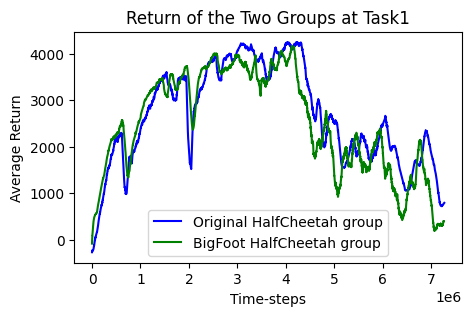

In [97]:
plt.figure(figsize=(5, 3))

plt.plot(time_steps0, group0['AvgR'],label='Original HalfCheetah group', color='blue')
plt.plot(time_steps1, group1['AvgR'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

In [89]:
time_steps0 = np.array(list(range(len(group0['AvgR']))))*1024
time_steps1 = np.array(list(range(len(group1['AvgR']))))*1024

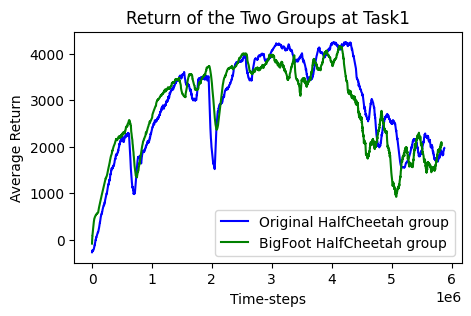

In [90]:
plt.figure(figsize=(5, 3))

plt.plot(time_steps0, group0['AvgR'],label='Original HalfCheetah group', color='blue')
plt.plot(time_steps1, group1['AvgR'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

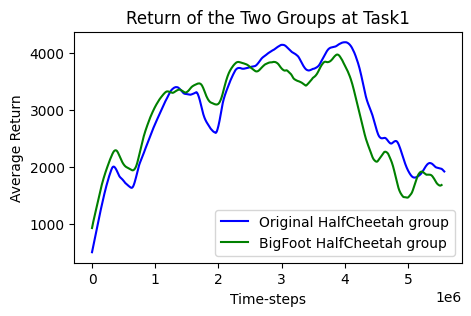

In [91]:
plt.figure(figsize=(5, 3))

time_steps0 = np.array(list(range(len(smooth(group0['AvgR'], 300)))))*1024
time_steps1 = np.array(list(range(len(smooth(group1['AvgR'], 300)))))*1024

plt.plot(time_steps0, smooth(group0['AvgR'], 300),label='Original HalfCheetah group', color='blue')
plt.plot(time_steps1, smooth(group1['AvgR'], 300),label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

# Fairness Threshold = 500, two tasks penalty on action magnitude

In [441]:
with open('focops_results/focops_group fairness_0_HalfCheetah-v4_log_data_seed_1.pkl', 'rb') as f:
    group0 = pickle.load(f)
with open('focops_results/focops_group fairness_1_BigFootHalfCheetah_log_data_seed_1.pkl', 'rb') as f:
    group1 = pickle.load(f)

In [442]:
time_steps0 = np.array(list(range(len(group0['AvgR']))))*1024
time_steps1 = np.array(list(range(len(group1['AvgR']))))*1024

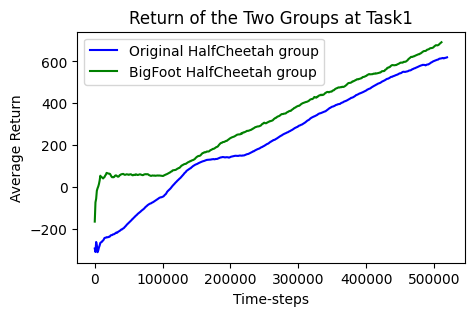

In [443]:
plt.figure(figsize=(5, 3))

plt.plot(time_steps0, group0['AvgR'],label='Original HalfCheetah group', color='blue')
plt.plot(time_steps1, group1['AvgR'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

In [21]:
time_steps0 = np.array(list(range(len(group0['AvgR2']))))*1024
time_steps1 = np.array(list(range(len(group1['AvgR2']))))*1024

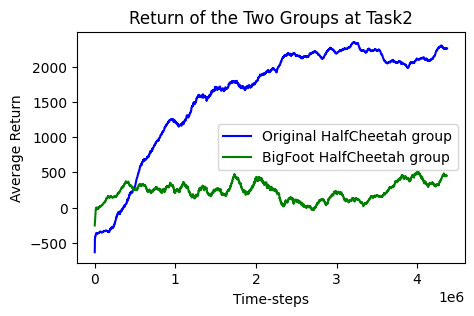

In [22]:
plt.figure(figsize=(5, 3))

plt.plot(time_steps0, group0['AvgR2'],label='Original HalfCheetah group', color='blue')
plt.plot(time_steps1, group1['AvgR2'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task2")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

# Fairness Threshold = 100, two tasks, with no penalty on action for debugging purpose

In [519]:
with open('focops_results/focops_group fairness_0_HalfCheetah-v4_log_data_seed_1.pkl', 'rb') as f:
    group0 = pickle.load(f)
with open('focops_results/focops_group fairness_1_BigFootHalfCheetah_log_data_seed_1.pkl', 'rb') as f:
    group1 = pickle.load(f)

In [520]:
time_steps0 = np.array(list(range(len(group0['AvgR']))))*1024
time_steps1 = np.array(list(range(len(group1['AvgR']))))*1024

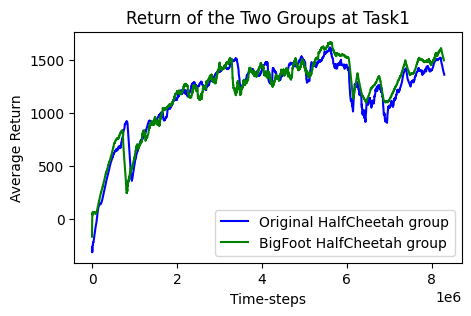

In [521]:
plt.figure(figsize=(5, 3))

plt.plot(time_steps0, group0['AvgR'],label='Original HalfCheetah group', color='blue')
plt.plot(time_steps1, group1['AvgR'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

In [522]:
time_steps0 = np.array(list(range(len(group0['AvgR2']))))*1024
time_steps1 = np.array(list(range(len(group1['AvgR2']))))*1024

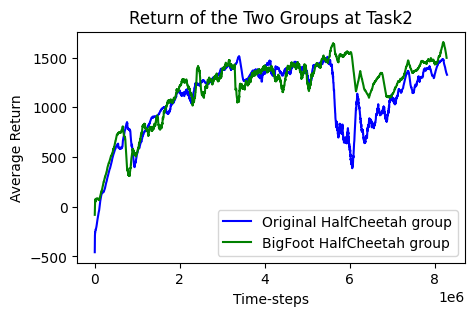

In [523]:
plt.figure(figsize=(5, 3))

plt.plot(time_steps0, group0['AvgR2'],label='Original HalfCheetah group', color='blue')
plt.plot(time_steps1, group1['AvgR2'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task2")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

# Fairness Threshold = 100, tmlr on two tasks

In [33]:
with open('focops_results/focops_group fairness_0_HalfCheetah-v4_hyperparams_seed_1_tmlr_two_tasks_gf100.pkl', 'rb') as f:
    group0 = pickle.load(f)
with open('focops_results/focops_group fairness_1_BigFootHalfCheetah_hyperparams_seed_1_tmlr_two_tasks_gf100.pkl', 'rb') as f:
    group1 = pickle.load(f)

In [35]:
# time_steps0 = np.array(list(range(len(group0['AvgR']))))*1024
# time_steps1 = np.array(list(range(len(group1['AvgR']))))*1024

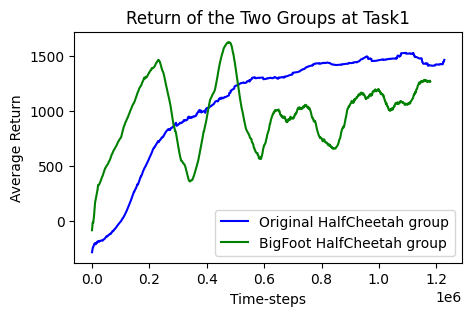

In [24]:
plt.figure(figsize=(5, 3))

plt.plot(time_steps0, group0['AvgR'],label='Original HalfCheetah group', color='blue')
plt.plot(time_steps1, group1['AvgR'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

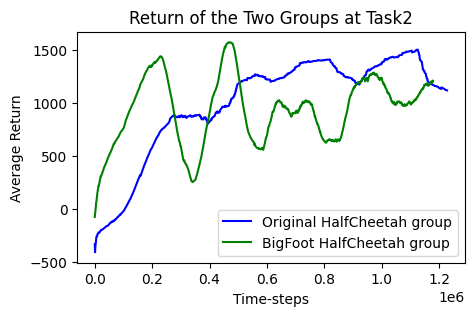

In [25]:
plt.figure(figsize=(5, 3))

plt.plot(time_steps0, group0['AvgR2'],label='Original HalfCheetah group', color='blue')
plt.plot(time_steps1, group1['AvgR2'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task2")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

# Fairness Threshold = 1000, tmlr baseline

In [36]:
with open('focops_results/focops_group fairness_0_HalfCheetah-v4_log_data_seed_1_tmlr_1task.pkl', 'rb') as f:
    group0 = pickle.load(f)
with open('focops_results/focops_group fairness_1_BigFootHalfCheetah_log_data_seed_1_tmlr_1task.pkl', 'rb') as f:
    group1 = pickle.load(f)

In [38]:
time_steps0 = np.array(list(range(len(group0['AvgR']))))*1024
time_steps1 = np.array(list(range(len(group1['AvgR']))))*1024

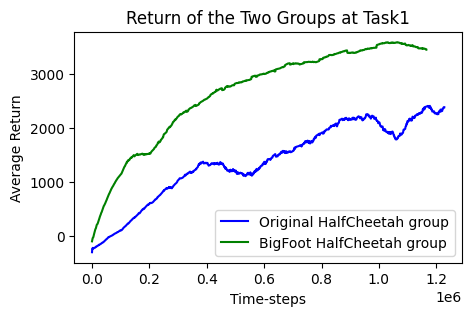

In [826]:
plt.figure(figsize=(5, 3))

plt.plot(time_steps0, group0['AvgR'],label='Original HalfCheetah group', color='blue')
plt.plot(time_steps1, group1['AvgR'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

In [40]:
time_steps0 = np.array(list(range(len(group0['AvgR2']))))*1024
time_steps1 = np.array(list(range(len(group1['AvgR2']))))*1024

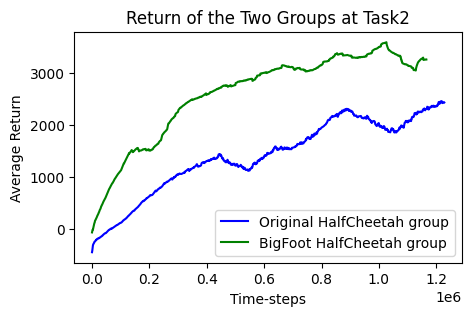

In [41]:
plt.figure(figsize=(5, 3))

plt.plot(time_steps0, group0['AvgR2'],label='Original HalfCheetah group', color='blue')
plt.plot(time_steps1, group1['AvgR2'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task2")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

# Fairness Threshold = 1000, our proposed algorithm on two tasks

In [859]:
with open('focops_results/focops_group fairness_0_HalfCheetah-v4_log_data_seed_1_two_tasks_1000.pkl', 'rb') as f:
    group0 = pickle.load(f)
with open('focops_results/focops_group fairness_1_BigFootHalfCheetah_log_data_seed_1_two_tasks_1000.pkl', 'rb') as f:
    group1 = pickle.load(f)

In [860]:
time_steps0 = np.array(list(range(len(group0['AvgR']))))*1024
time_steps1 = np.array(list(range(len(group1['AvgR']))))*1024

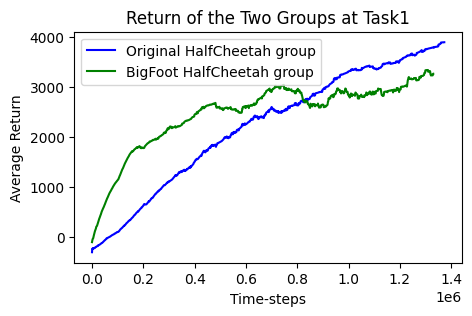

In [861]:
plt.figure(figsize=(5, 3))

plt.plot(time_steps0, group0['AvgR'],label='Original HalfCheetah group', color='blue')
plt.plot(time_steps1, group1['AvgR'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

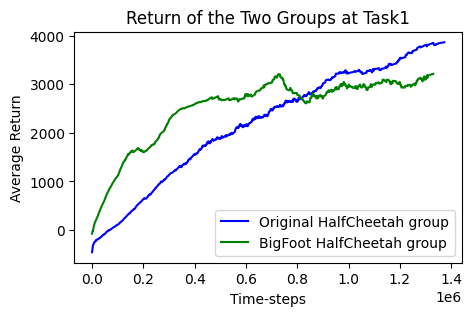

In [862]:
plt.figure(figsize=(5, 3))

plt.plot(time_steps0, group0['AvgR2'],label='Original HalfCheetah group', color='blue')
plt.plot(time_steps1, group1['AvgR2'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

# Fairness Threshold = 1000, our proposed algorithm on two tasks, updating the policy on two tasks obs

In [884]:
with open('focops_results/focops_group fairness_0_HalfCheetah-v4_log_data_seed_1_2obs_policy_collapse.pkl', 'rb') as f:
    group0 = pickle.load(f)
with open('focops_results/focops_group fairness_1_BigFootHalfCheetah_log_data_seed_1_2obs_policy_collapse.pkl', 'rb') as f:
    group1 = pickle.load(f)

In [885]:
time_steps0 = np.array(list(range(len(group0['AvgR']))))*1024
time_steps1 = np.array(list(range(len(group1['AvgR']))))*1024

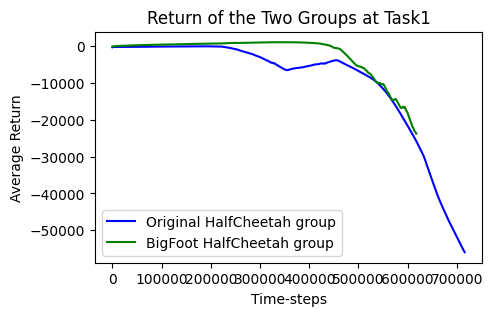

In [886]:
plt.figure(figsize=(5, 3))

plt.plot(time_steps0, group0['AvgR'],label='Original HalfCheetah group', color='blue')
plt.plot(time_steps1, group1['AvgR'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

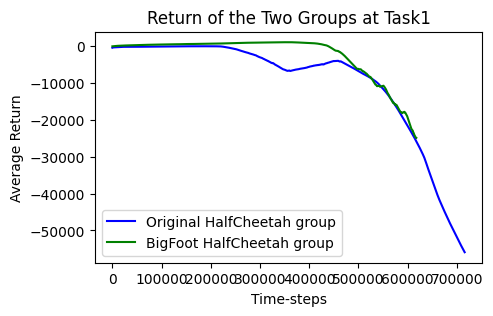

In [887]:
plt.figure(figsize=(5, 3))

plt.plot(time_steps0, group0['AvgR2'],label='Original HalfCheetah group', color='blue')
plt.plot(time_steps1, group1['AvgR2'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

# Fairness Threshold = 1000, our proposed algorithm on two tasks, updating the policy on two tasks obs

In [981]:
with open('focops_results/focops_group fairness_0_HalfCheetah-v4_log_data_seed_1.pkl', 'rb') as f:
    group0 = pickle.load(f)
with open('focops_results/focops_group fairness_1_BigFootHalfCheetah_log_data_seed_1.pkl', 'rb') as f:
    group1 = pickle.load(f)

In [982]:
time_steps0 = np.array(list(range(len(group0['AvgR']))))*1024
time_steps1 = np.array(list(range(len(group1['AvgR']))))*1024

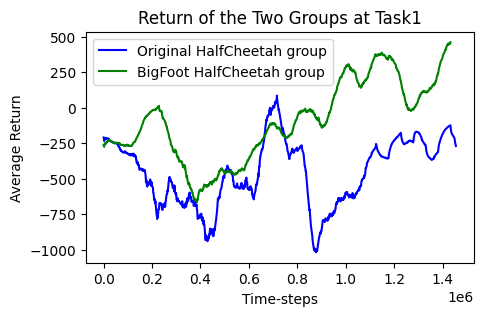

In [983]:
plt.figure(figsize=(5, 3))

plt.plot(time_steps0, group0['AvgR'],label='Original HalfCheetah group', color='blue')
plt.plot(time_steps1, group1['AvgR'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

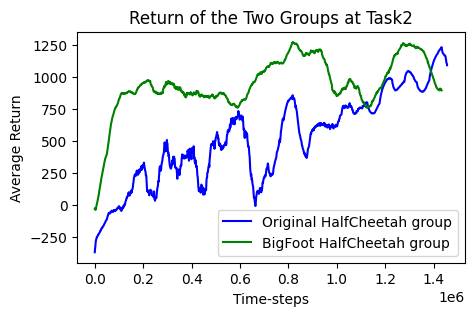

In [984]:
plt.figure(figsize=(5, 3))

plt.plot(time_steps0, group0['AvgR2'],label='Original HalfCheetah group', color='blue')
plt.plot(time_steps1, group1['AvgR2'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task2")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

# Fairness Threshold = 100, tmlr on one task

In [22]:
with open('focops_results/focops_group fairness_0_HalfCheetah-v4_log_data_seed_1_tmlr_gf100_1task.pkl', 'rb') as f:
    group0 = pickle.load(f)
with open('focops_results/focops_group fairness_1_BigFootHalfCheetah_log_data_seed_1_tmlr_gf100_1task.pkl', 'rb') as f:
    group1 = pickle.load(f)

In [23]:
time_steps0 = np.array(list(range(len(group0['AvgR']))))*1024
time_steps1 = np.array(list(range(len(group1['AvgR']))))*1024

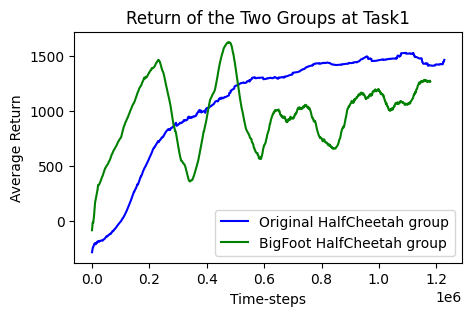

In [24]:
plt.figure(figsize=(5, 3))

plt.plot(time_steps0, group0['AvgR'],label='Original HalfCheetah group', color='blue')
plt.plot(time_steps1, group1['AvgR'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

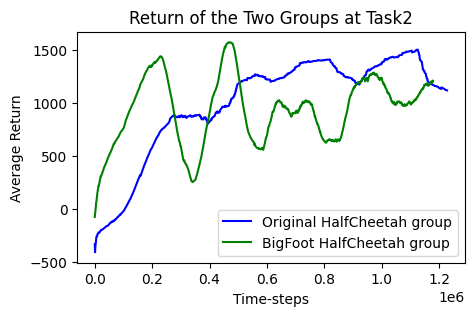

In [25]:
plt.figure(figsize=(5, 3))

plt.plot(time_steps0, group0['AvgR2'],label='Original HalfCheetah group', color='blue')
plt.plot(time_steps1, group1['AvgR2'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task2")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

# Fairness Threshold = 100, tmlr on two tasks

In [33]:
with open('focops_results/focops_group fairness_0_HalfCheetah-v4_hyperparams_seed_1_tmlr_two_tasks_gf100.pkl', 'rb') as f:
    group0 = pickle.load(f)
with open('focops_results/focops_group fairness_1_BigFootHalfCheetah_hyperparams_seed_1_tmlr_two_tasks_gf100.pkl', 'rb') as f:
    group1 = pickle.load(f)

In [35]:
# time_steps0 = np.array(list(range(len(group0['AvgR']))))*1024
# time_steps1 = np.array(list(range(len(group1['AvgR']))))*1024

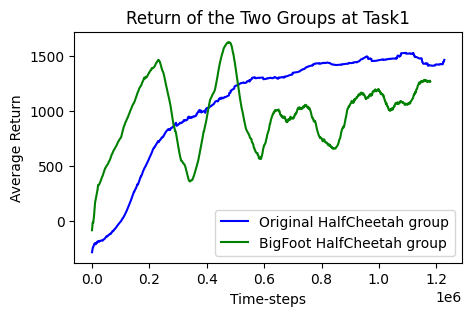

In [24]:
plt.figure(figsize=(5, 3))

plt.plot(time_steps0, group0['AvgR'],label='Original HalfCheetah group', color='blue')
plt.plot(time_steps1, group1['AvgR'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

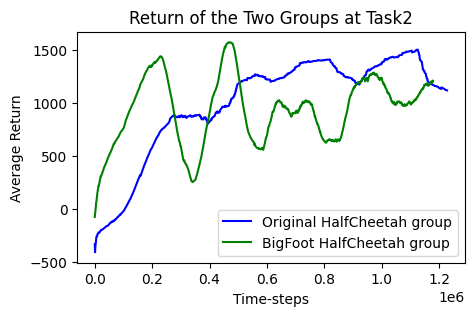

In [25]:
plt.figure(figsize=(5, 3))

plt.plot(time_steps0, group0['AvgR2'],label='Original HalfCheetah group', color='blue')
plt.plot(time_steps1, group1['AvgR2'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task2")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

# Fairness Threshold = 500, two tasks, with no penalty on action for debugging purpose

In [585]:
with open('focops_results/focops_group fairness_0_HalfCheetah-v4_log_data_seed_1.pkl', 'rb') as f:
    group0 = pickle.load(f)
with open('focops_results/focops_group fairness_1_BigFootHalfCheetah_log_data_seed_1.pkl', 'rb') as f:
    group1 = pickle.load(f)

In [586]:
time_steps0 = np.array(list(range(len(group0['AvgR']))))*1024
time_steps1 = np.array(list(range(len(group1['AvgR']))))*1024

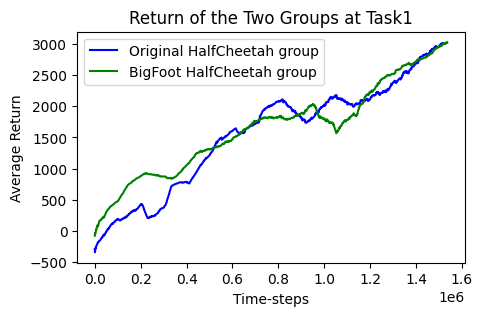

In [587]:
plt.figure(figsize=(5, 3))

plt.plot(time_steps0[:1500], group0['AvgR'][:1500],label='Original HalfCheetah group', color='blue')
plt.plot(time_steps1[:1500], group1['AvgR'][:1500],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

In [588]:
time_steps0 = np.array(list(range(len(group0['AvgR2']))))*1024
time_steps1 = np.array(list(range(len(group1['AvgR2']))))*1024

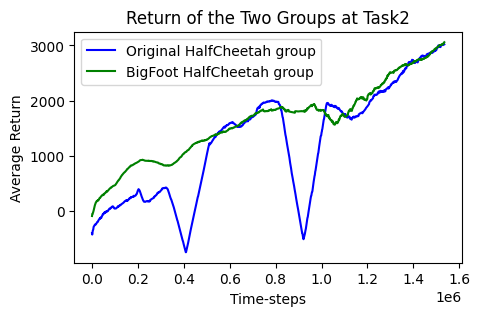

In [589]:
plt.figure(figsize=(5, 3))

plt.plot(time_steps0[:1500], group0['AvgR2'][:1500],label='Original HalfCheetah group', color='blue')
plt.plot(time_steps1[:1500], group1['AvgR2'][:1500],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task2")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

# Fairness Threshold = 500, two tasks, with no penalty on action for debugging purpose

In [305]:
with open('focops_results/focops_group fairness_0_HalfCheetah-v4_log_data_seed_1.pkl', 'rb') as f:
    group0 = pickle.load(f)
with open('focops_results/focops_group fairness_1_BigFootHalfCheetah_log_data_seed_1.pkl', 'rb') as f:
    group1 = pickle.load(f)

In [306]:
time_steps0 = np.array(list(range(len(group0['AvgR']))))*1024
time_steps1 = np.array(list(range(len(group1['AvgR']))))*1024

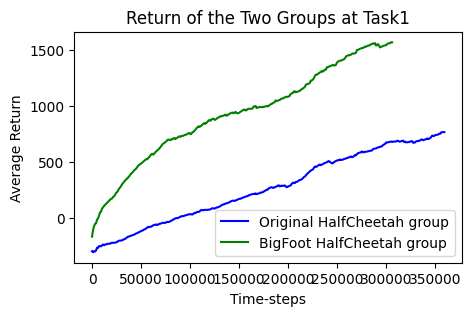

In [307]:
plt.figure(figsize=(5, 3))

plt.plot(time_steps0, group0['AvgR'],label='Original HalfCheetah group', color='blue')
plt.plot(time_steps1, group1['AvgR'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

In [308]:
time_steps0 = np.array(list(range(len(group0['AvgR2']))))*1024
time_steps1 = np.array(list(range(len(group1['AvgR2']))))*1024

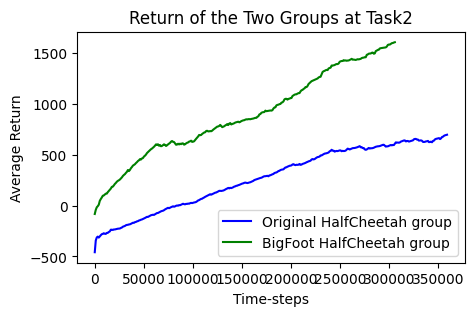

In [309]:
plt.figure(figsize=(5, 3))

plt.plot(time_steps0, group0['AvgR2'],label='Original HalfCheetah group', color='blue')
plt.plot(time_steps1, group1['AvgR2'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task2")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

# For Fairness Threshold = 100 with two constraint functions

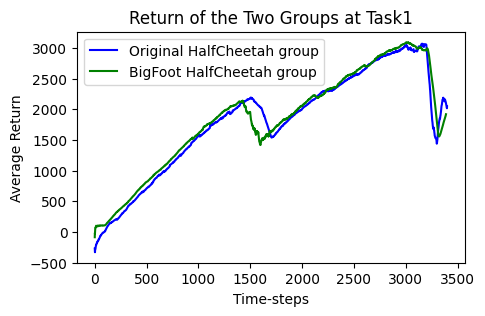

In [385]:
plt.figure(figsize=(5, 3))

plt.plot(group0['AvgR'],label='Original HalfCheetah group', color='blue')
plt.plot(group1['AvgR'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

# Plots of Previous Implementation

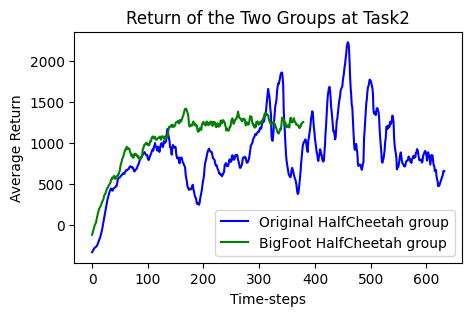

In [86]:
plt.figure(figsize=(5, 3))

plt.plot(group0['AvgR2'],label='Original HalfCheetah group', color='blue')
plt.plot(group1['AvgR2'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task2")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

In [87]:
g0 = pd.DataFrame()
g0['time'] = group0['time']
g0['group0 AvgR1'] = group0['AvgR']
g0['group0 AvgR2'] = group0['AvgR2']

g1 = pd.DataFrame()
g1['time'] = group1['time']
g1['group1 AvgR1'] = group1['AvgR']
g1['group1 AvgR2'] = group1['AvgR2']

all_groups = pd.concat([g0, g1]).sort_values('time').reset_index()

# forward fill the first group and backward fill the second group
# (because the second group starts with Nan values).
all_groups['group0 AvgR1'] = all_groups['group0 AvgR1'].fillna(method='ffill')
all_groups['group1 AvgR1'] = all_groups['group1 AvgR1'].fillna(method='bfill').fillna(method='ffill')

all_groups['group0 AvgR2'] = all_groups['group0 AvgR2'].fillna(method='ffill')
all_groups['group1 AvgR2'] = all_groups['group1 AvgR2'].fillna(method='bfill').fillna(method='ffill')

all_groups['group fairness gap AvgR1'] = np.abs(all_groups['group0 AvgR1'] - all_groups['group1 AvgR1'])
all_groups['group fairness gap AvgR2'] = np.abs(all_groups['group0 AvgR2'] - all_groups['group1 AvgR2'])

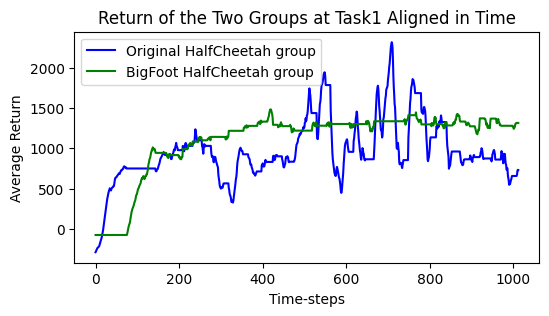

In [91]:
plt.figure(figsize=(6, 3))

plt.plot(all_groups['group0 AvgR1'],label='Original HalfCheetah group', color='blue')
plt.plot(all_groups['group1 AvgR1'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1 Aligned in Time")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

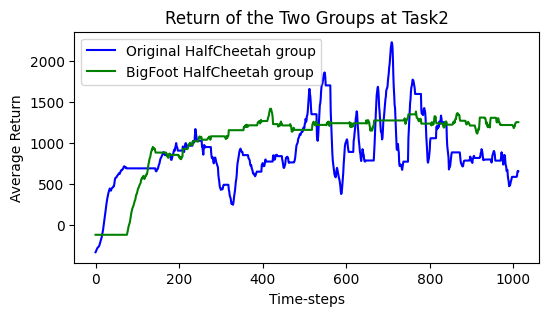

In [89]:
plt.figure(figsize=(6, 3))

plt.plot(all_groups['group0 AvgR2'],label='Original HalfCheetah group', color='blue')
plt.plot(all_groups['group1 AvgR2'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task2")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

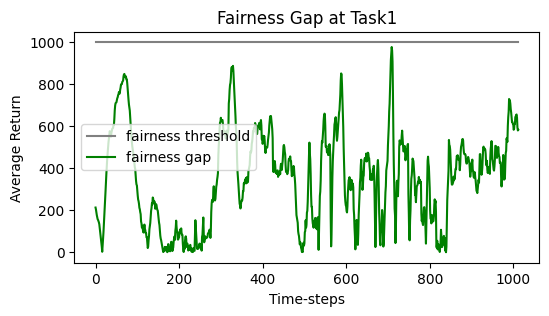

In [90]:
plt.figure(figsize=(6, 3))

plt.plot([1000]*len(all_groups), label='fairness threshold', color='grey')
plt.plot(all_groups['group fairness gap AvgR1'], label='fairness gap', color='green')

plt.title("Fairness Gap at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()



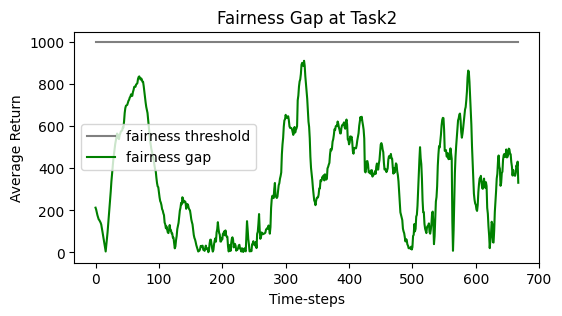

In [83]:
plt.figure(figsize=(6, 3))

plt.plot([1000]*len(all_groups), label='fairness threshold', color='grey')
plt.plot(all_groups['group fairness gap AvgR2'], label='fairness gap', color='green')

plt.title("Fairness Gap at Task2")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()



# For Fairness Threshold = 100

In [234]:
with open('focops_results/focops_group fairness_0_HalfCheetah-v4_log_data_seed_0.pkl', 'rb') as f:
    group0 = pickle.load(f)
with open('focops_results/focops_group fairness_1_BigFootHalfCheetah_log_data_seed_0.pkl', 'rb') as f:
    group1 = pickle.load(f)

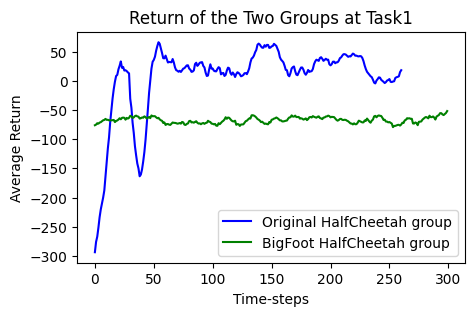

In [235]:
plt.figure(figsize=(5, 3))

plt.plot(group0['AvgR'],label='Original HalfCheetah group', color='blue')
plt.plot(group1['AvgR'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

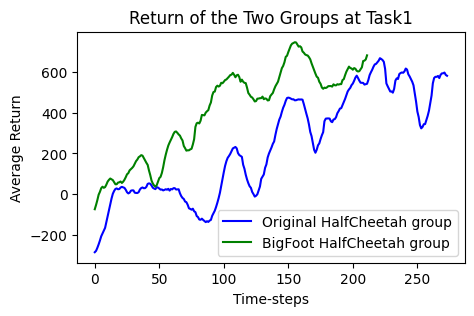

In [85]:
plt.figure(figsize=(5, 3))

plt.plot(group0['AvgR'],label='Original HalfCheetah group', color='blue')
plt.plot(group1['AvgR'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

In [86]:
g0 = pd.DataFrame()
g0['time'] = group0['time']
g0['group0 AvgR1'] = group0['AvgR']
g0['group0 AvgR2'] = group0['AvgR2']

g1 = pd.DataFrame()
g1['time'] = group1['time']
g1['group1 AvgR1'] = group1['AvgR']
g1['group1 AvgR2'] = group1['AvgR2']

all_groups = pd.concat([g0, g1]).sort_values('time').reset_index()

# forward fill the first group and backward fill the second group
# (because the second group starts with Nan values).
all_groups['group0 AvgR1'] = all_groups['group0 AvgR1'].fillna(method='ffill')
all_groups['group1 AvgR1'] = all_groups['group1 AvgR1'].fillna(method='bfill').fillna(method='ffill')

all_groups['group0 AvgR2'] = all_groups['group0 AvgR2'].fillna(method='ffill')
all_groups['group1 AvgR2'] = all_groups['group1 AvgR2'].fillna(method='bfill').fillna(method='ffill')

all_groups['group fairness gap AvgR1'] = np.abs(all_groups['group0 AvgR1'] - all_groups['group1 AvgR1'])
all_groups['group fairness gap AvgR2'] = np.abs(all_groups['group0 AvgR2'] - all_groups['group1 AvgR2'])

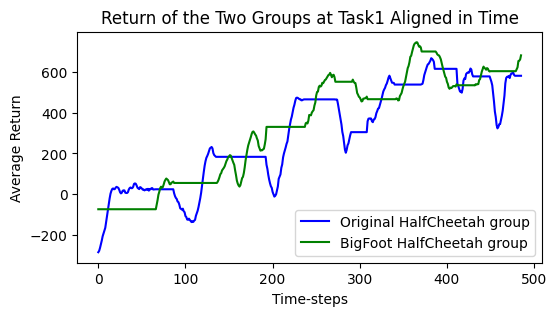

In [87]:
plt.figure(figsize=(6, 3))

plt.plot(all_groups['group0 AvgR1'],label='Original HalfCheetah group', color='blue')
plt.plot(all_groups['group1 AvgR1'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1 Aligned in Time")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

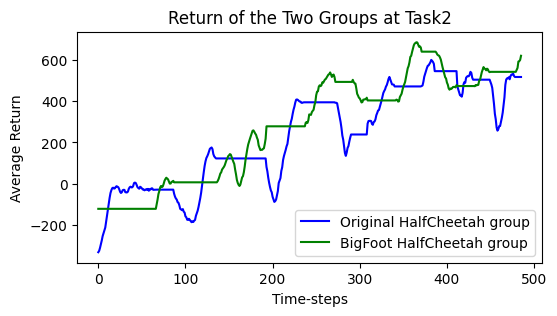

In [88]:
plt.figure(figsize=(6, 3))

plt.plot(all_groups['group0 AvgR2'],label='Original HalfCheetah group', color='blue')
plt.plot(all_groups['group1 AvgR2'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task2")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

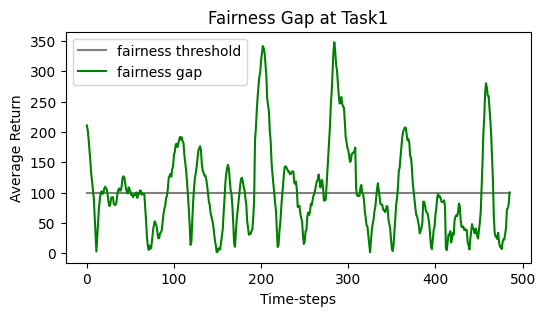

In [89]:
plt.figure(figsize=(6, 3))

plt.plot([100]*len(all_groups), label='fairness threshold', color='grey')
plt.plot(all_groups['group fairness gap AvgR1'], label='fairness gap', color='green')

plt.title("Fairness Gap at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()



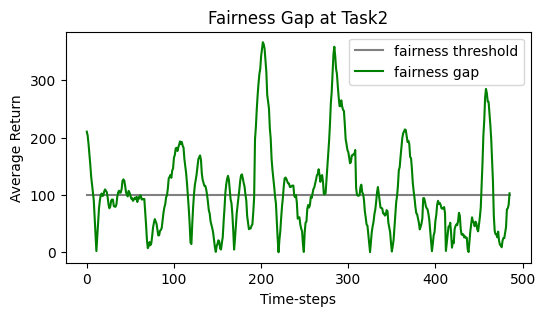

In [90]:
plt.figure(figsize=(6, 3))

plt.plot([100]*len(all_groups), label='fairness threshold', color='grey')
plt.plot(all_groups['group fairness gap AvgR2'], label='fairness gap', color='green')

plt.title("Fairness Gap at Task2")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

